In [1]:
%matplotlib inline
import math
import numpy as np
import time
import torch
from d2l import torch as d2l

In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [3]:
class Timer:
    """定义一个计时器类"""
    
    def start(self):
        self.tik = time.time()  # 记录当前时间
        
    def __init__(self):
        self.times = []  
        self.start()  # 开始计时
    
    def stop(self):
        self.times.append(time.time() - self.tik)
        return self.times[-1]
        
    def avg(self):
        return sum(self.times) / len(self.times)
        
    def sum(self):
        return sum(self.times)
        
    def cumsum(self):
        return np.array(self.times).cumsunm().tolist()  # cumsum()计算的是从头道当前位置上的累加，如1,3,6,10

In [4]:
c =  torch.zeros(n)
timer = Timer()  # Timer的实例在定义时就会init,也就执行了self.tik=time.time()

for i in range(n):
    c[i] = a[i] + b[i]  # 先用for循环算10000维加法
f'{timer.stop():.5f}sec'  # .stop记录了一次停表时间

'0.05907sec'

In [5]:
timer.start()  # 记录当前时间

d = a + b  # 使用tensor加法
f'{timer.stop():.5f}sec'  # 再记录一次停表时间，求得差值

'0.00000sec'

In [8]:
def normal(x, mu, sigma):
    """正态分布：随机变量x, 均值mu, 标准差sigma, 正态分布概率密度函数p"""
    p = np.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

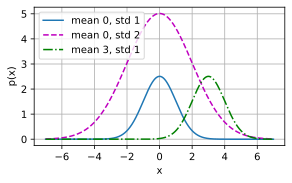

In [9]:
"""可视化正态分布"""
x = np.arange(-7, 7, 0.01)  # 生成[-7,7)数组，步长为0.01

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, 
         [normal(x, mu, sigma) for mu, sigma in params], 
         xlabel='x', 
         ylabel='p(x)', 
         figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params]
        )